# Load images with calibration

## Imports and Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from aklab.mpls import font_setup

In [2]:
# Don't know how to import locally, so I just use %run
%run ../tools/echelle.py

In [3]:
files_cmos = {
    "orders": "pattern_cmos.txt",
    "wavelength": "Th_wavelength_CMOS.txt",
    "sphr": "sphere_CMOS.sif",
    "bkgr": "sphere_CMOS_bkg.sif",
    "integral": "integrating_sphere.txt",
}
files_ccd = {
    "orders": "pattern.txt",
    "wavelength": "Th_wavelength.txt",
    "sphr": "absolute_20170613_b8_0.2_v2.sif",
    "bkgr": "absolute_20170613_b8_0.2_bkg.sif",
    "integral": "integrating_sphere.txt",
}
bpth = '../resources/calibration_files'

# Load and calibrate

In [4]:
%run ../tools/echelle.py
cb = Calibrations(bpth,files_cmos)
cb.start()

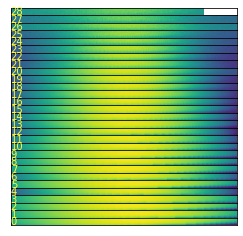

In [5]:
im = EchelleImage(os.path.join(bpth,'sphere_CMOS.sif'),clbr=cb)
im.plot_cut_image(2,aspect=5)

In [6]:
im.info['size']

(2560, 2160)

In [7]:
im.images[0].shape[::-1]

(2560, 2160)

# Load ThAr lamp data

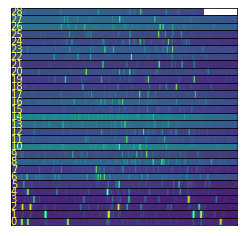

In [8]:
th = EchelleImage(os.path.join(bpth,'ThAr_10.0s_16bit.sif'),clbr=cb)
th.plot_cut_image(0,aspect=5)

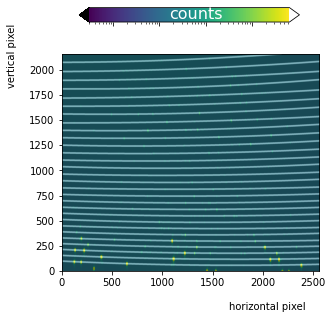

In [9]:
th.plot_frame(0,pattern=True)

In [10]:
th.calibrate()

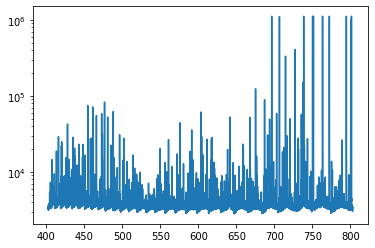

In [11]:
plt.plot(th.wavelength,th.spectra[0])
plt.yscale("log")